In [2]:
# run 
setup = "/home/eicuser/epw/share/eic_spect/dockerCommands.csh"
!source {setup};

Already up-to-date.
-- Configuring done
-- Generating done
-- Build files have been written to: /container/app/eic-smear/build/master
[100%] Built target eicsmear
[100%] Built target eicsmear
Install the project...
-- Install configuration: ""
-- Up-to-date: /container/app/eic-smear/eic-smear-master/include/eicsmear/erhic
-- Up-to-date: /container/app/eic-smear/eic-smear-master/include/eicsmear/erhic/EventGmcTrans.h
-- Up-to-date: /container/app/eic-smear/eic-smear-master/include/eicsmear/erhic/EventBase.h
-- Up-to-date: /container/app/eic-smear/eic-smear-master/include/eicsmear/erhic/ParticleIdentifier.h
-- Up-to-date: /container/app/eic-smear/eic-smear-master/include/eicsmear/erhic/Kinematics.h
-- Up-to-date: /container/app/eic-smear/eic-smear-master/include/eicsmear/erhic/Pythia6EventBuilder.h
-- Up-to-date: /container/app/eic-smear/eic-smear-master/include/eicsmear/erhic/Pythia6ParticleBuilder.h
-- Up-to-date: /container/app/eic-smear/eic-smear-master/include/eicsmear/erhic/EventMi

In [3]:
import os
import ROOT

Welcome to JupyROOT 6.19/03


In [4]:
from pyjano.jana import Jana
jana = Jana()

In [5]:
jana.plugins_gui()

HTML(value='\n\n\n    <input type="hidden" class=".plugin_data_input" value="">\n    <div class="row">\n      …

<IPython.core.display.Javascript object>

In [6]:
# set input and output directories, then check contents
input_dir = '../lund_generated/'
input_name = '10_100' # Beam energies: 5_41, 5_100, 10_100, 18_275 
output_dir = '../outTree/'

In [7]:
!ls {input_dir}
!ls {output_dir}

zc_10_100.txt  zc_18_275.txt  zc_5_100.txt  zc_5_41.txt
zc_nosm_10_100.root	zc_smbeast_5_100.root	  zc_smjleic_10_100.root
zc_nosm_18_275.root	zc_smbeast_5_41.root	  zc_smjleic_18_275.root
zc_nosm_5_100.root	zc_smephenix_10_100.root  zc_smjleic_5_100.root
zc_nosm_5_41.root	zc_smephenix_18_275.root  zc_smjleic_5_41.root
zc_smbeast_10_100.root	zc_smephenix_5_100.root
zc_smbeast_18_275.root	zc_smephenix_5_41.root


Create ROOT TTrees from with smearing of all detectors

In [8]:
# loop over detectors and make smeard files
detectors = ['jleic', 'beast', 'ephenix']

for detector_name in detectors:
    Jana().plugin('lund_reader')\
          .plugin('event_writer')\
          .plugin('eic_smear', detector=detector_name)\
          .plugin('jana', nevents=50000, output='%s/zc_sm%s_%s.root' % (output_dir,detector_name,input_name))\
          .source('%s/zc_%s.txt' % (input_dir,input_name))\
          .run()

To compare smeared data with not smeared, lets create also not smeared data set

In [9]:
Jana().plugin('lund_reader')\
      .plugin('event_writer')\
      .plugin('jana', nevents=50000, output='%s/zc_nosm_%s.root' % (output_dir,input_name))\
      .source('%s/zc_%s.txt' % (input_dir,input_name))\
      .run()

In [13]:
# Open root file to test output
file = ROOT.TFile('%s/zc_smjleic_5_41.root' % (output_dir))

In [14]:
# Preparing histograms
xy_hist = ROOT.TH2D('xy_hist', 'Neutrons angle distribution', 60, -0.15, 0.15, 60, -0.15, 0.15)
x_hist = ROOT.TH1D('x_hist', 'Neutrons horizontal angle distribution', 60, -0.15, 0.15)
y_hist = ROOT.TH1D('y_hist', 'Neutrons vertical angle distribution', 60, -0.15, 0.15)
e_hist = ROOT.TH1D('pt_hist', 'Neutrons Pt distribution; [GeV]', 140, 0, 4)

#protons_only = ROOT.TCut('pdg==2112') # neutron
#protons_only = ROOT.TCut('pdg==211')  # pi+
#protons_only = ROOT.TCut('pdg==11')   # e-
protons_only = ROOT.TCut('pdg==-11')  # e+

In [15]:
# Reading a tree from the file
tree = file.Get('events').Get('tree')

# Filling the histograms from the tree
canvas = ROOT.TCanvas('canvas', 'canvas',600,400)
tree.Draw('asin(py/p):atan(px/pz) >> xy_hist', protons_only)
tree.Draw('atan(px/pz) >> x_hist', protons_only)
tree.Draw('asin(py/p) >> y_hist', protons_only)
tree.Draw('sqrt(px*px+py*py) >> pt_hist', protons_only)

48990

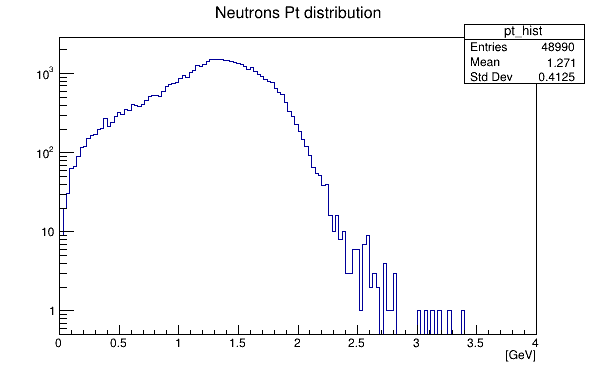

In [16]:
pad = canvas.cd()
pad.SetLogy(True)
e_hist.Draw()
canvas.Draw()

In [20]:
# Code below not working for PYTHIA, wrong formatted input...
input_dir = '../../PYTHIA_6.5/PHP/'
input_name = 'pythia_e-p_10x100_Q0_100k_msel2_PHP'

In [21]:
Jana().plugin('lund_reader')\
      .plugin('event_writer')\
      .plugin('eic_smear', detector="jleic")\
      .plugin('jana', nevents=10000, output='%s/pythia_smjleic.root' % (output_dir))\
      .source('%s/%s.txt' % (input_dir,input_name))\
      .run()

In [22]:
Jana().plugin('lund_reader')\
      .plugin('event_writer')\
      .plugin('jana', nevents=10000, output='%s/pythia_nosm.root' % (output_dir))\
      .source('%s/%s.txt' % (input_dir,input_name))\
      .run()

In [30]:
# Run TSelector over trees to create Zc histograms
import os
os.chdir('/home/eicuser/epw/share/eic_spect/selector/')
os.listdir()

['selector_zc_C.d', 'selector_zc.C', 'runSelector.C', 'selector_zc.h']

In [31]:
os.system('root -l -b -q runSelector.C')

0


Processing runSelector.C...
Processing detector: jleic at 5_41
Processing detector: jleic at 5_100
Processing detector: jleic at 10_100
Processing detector: jleic at 18_275
Processing detector: beast at 5_41
Processing detector: beast at 5_100
Processing detector: beast at 10_100
Processing detector: beast at 18_275
Processing detector: ephenix at 5_41
Processing detector: ephenix at 5_100
Processing detector: ephenix at 10_100
Processing detector: ephenix at 18_275


In [ ]:
# Run plotting macros to make plots

In [ ]:
# Plotting macro in python workbook